In [1]:
from sympy import *

In [2]:
gamma, pi, w_1, w_2 = symbols('gamma pi w_1 w_2')

MY_Y1 = 0.8
MY_Y2 = 1

In [3]:
Firm1 = (1-gamma)*(pi*(w_1/2)+(1-pi)*w_1)
Firm2 = gamma*w_2+(1-gamma)*(pi*w_2+(1-pi)*(w_2/2))
LOW = solve(Firm1-Firm2,pi)
LOW[0]

(2*gamma*w_1 + gamma*w_2 - 2*w_1 + w_2)/(gamma*w_1 + gamma*w_2 - w_1 - w_2)

In [4]:
pi_H = 1
pi_L = LOW[0]
Y1 = symbols("Y1")
profit_1 = (Y1 - w_1)*(1-((gamma**2 *(1-pi_H)**2) + ((1-gamma)**2 *(1-pi_L)**2) + (2*gamma*(1-gamma)*(1-pi_H)*(1-pi_L))))

In [5]:
profit_1

(Y1 - w_1)*(-(1 - gamma)**2*(1 - (2*gamma*w_1 + gamma*w_2 - 2*w_1 + w_2)/(gamma*w_1 + gamma*w_2 - w_1 - w_2))**2 + 1)

In [6]:
d1 = diff(profit_1, w_1)

In [7]:
d1

(1 - gamma)**2*(1 - (2*gamma*w_1 + gamma*w_2 - 2*w_1 + w_2)/(gamma*w_1 + gamma*w_2 - w_1 - w_2))**2 - (1 - gamma)**2*(1 - (2*gamma*w_1 + gamma*w_2 - 2*w_1 + w_2)/(gamma*w_1 + gamma*w_2 - w_1 - w_2))*(Y1 - w_1)*(-2*(1 - gamma)*(2*gamma*w_1 + gamma*w_2 - 2*w_1 + w_2)/(gamma*w_1 + gamma*w_2 - w_1 - w_2)**2 - 2*(2*gamma - 2)/(gamma*w_1 + gamma*w_2 - w_1 - w_2)) - 1

In [8]:
d1 = simplify(simplify(d1))

In [9]:
n,_ = fraction(d1)

In [10]:
n

2*w_2*(3 - gamma)*(Y1 - w_1)*(gamma - 1)**3*(gamma*w_1 - w_1 + 2*w_2) + (gamma - 1)**2*(gamma*w_1 - w_1 + 2*w_2)**2*(gamma*w_1 + gamma*w_2 - w_1 - w_2) - (gamma*w_1 + gamma*w_2 - w_1 - w_2)**3

In [11]:
n.subs(Y1, MY_Y1)

2*w_2*(0.8 - w_1)*(3 - gamma)*(gamma - 1)**3*(gamma*w_1 - w_1 + 2*w_2) + (gamma - 1)**2*(gamma*w_1 - w_1 + 2*w_2)**2*(gamma*w_1 + gamma*w_2 - w_1 - w_2) - (gamma*w_1 + gamma*w_2 - w_1 - w_2)**3

In [12]:
#simplify(solve(n.subs(Y1, 1), w_1)[0])

In [13]:
Y2 = symbols("Y2")
profit_2 = (Y2 - w_2)*(1-((gamma**2 *(pi_H)**2) + ((1-gamma)**2 *(pi_L)**2) + (2*gamma*(1-gamma)*(pi_H)*(pi_L))))

In [14]:
profit_2

(Y2 - w_2)*(-gamma**2 - 2*gamma*(1 - gamma)*(2*gamma*w_1 + gamma*w_2 - 2*w_1 + w_2)/(gamma*w_1 + gamma*w_2 - w_1 - w_2) - (1 - gamma)**2*(2*gamma*w_1 + gamma*w_2 - 2*w_1 + w_2)**2/(gamma*w_1 + gamma*w_2 - w_1 - w_2)**2 + 1)

In [15]:
d2 = diff(profit_2, w_2)

In [16]:
n2, _ = fraction(simplify(d2.subs(Y2, MY_Y2)))

In [17]:
n2

w_1*(gamma**2*w_1**2 - gamma**2*w_1*w_2 + 2*gamma**2*w_1 - 4*gamma*w_1**2 + 8*gamma*w_1*w_2 - 10*gamma*w_1 + 2*gamma*w_2 + 3*w_1**2 - 15*w_1*w_2 + 12*w_1 - 6*w_2)

In [18]:
solve(n2, w_2)[0]

w_1*(gamma*w_1 + 2*gamma - w_1 - 4)/(gamma*w_1 - 5*w_1 - 2)

In [19]:
f1_best = simplify(solve(n.subs(Y1, MY_Y1), w_1)[0])
f2_best = solve(n2, w_2)[0]

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image
w2new = gamma*w_1/2 + (1-gamma)*w_1

#d = (1-0.5*gamma)
#candidate_t = (w_2/d)*(w_2*(gamma - 1)/d + 2*gamma - 4) / (w_2 * (gamma-5) / d - 2)
#can_w1 = candidate_t / d


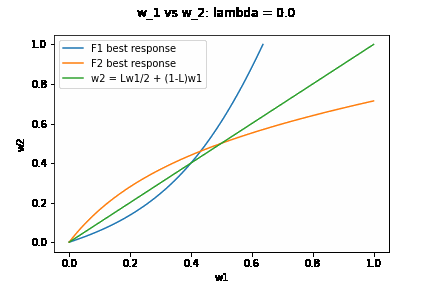

<Figure size 432x288 with 0 Axes>

In [21]:
images = []
for gam in np.linspace(0.000001, 0.9999, 100):
    plt.clf()
    fig, ax = plt.subplots()
    fig.suptitle(f"w_1 vs w_2: lambda = {round(gam, 2)}")
    
    mapper1 = lambdify(w_2, f1_best.subs(gamma, gam), modules=['numpy'])
    mapper2 = lambdify(w_1, f2_best.subs(gamma, gam), modules=['numpy'])
    w2s = np.linspace(0.0000001, 1, 100)
    w1s = mapper1(w2s)

    w1s2 = np.linspace(0.0000001, 1, 100)
    w2s2 = mapper2(w1s2)
    
    #mapper2a = lambdify(w_2, can_w1.subs(gamma, gam), modules=['numpy'])
    #w2sa = np.linspace(0.0000001, 1, 100)
    #w1sa = mapper2a(w2sa)

    plt.plot(w1s, w2s, label = "F1 best response")
    #plt.plot(w1sa, w2sa, label = "F2 reflected as F1 (wrong)")
    plt.plot(w1s2, w2s2, label = "F2 best response")

    mapper1 = lambdify(w_1, w2new.subs(gamma, gam), modules=['numpy'])
    w1s3 = np.linspace(0.0000001, 1, 100)
    w2s3 = mapper1(w1s3)
    plt.plot(w1s3, w2s3, label = "w2 = Lw1/2 + (1-L)w1")
    plt.xlabel("w1")
    plt.ylabel("w2")
    ax.legend()
    filex = BytesIO()
    fig.savefig(filex, format = "png")
    plt.close()
    filex.seek(0)
    images.append(filex)
    
    
imgs = [Image.open(image) for image in images]
masterfilex = BytesIO()
imgs[0].save(fp=masterfilex, format='GIF', append_images=imgs[1:], save_all=True, duration=100, loop=0)

# this is a GIF-displaying hack from https://stackoverflow.com/a/32108899
from IPython.display import HTML
from base64 import b64encode
HTML("<img src='data:image/gif;base64,{0}'/>".format(b64encode(masterfilex.getvalue()).decode('utf-8')))